# Manipulating data

In [1]:
import qgrid

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('test_data.csv')

In [4]:
qwidget = qgrid.show_grid(df)
qwidget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [5]:
updated_df = qwidget.get_changed_df()

In [6]:
updated_df

,first_name,last_name,age,pretest_score,posttest_score
0,Jason,Miller,42,4,25
1,Molly,Jacobson,52,24,94
2,Tina,Ali,36,31,57
3,Jake,Milner,24,2,62
4,Amy,Cooze,73,3,70
5,John,Dow,26,20,100
6,Jane,Dow,28,14,98


# Data preprocessing

In [7]:
df.columns

Index(['first_name', 'last_name', 'age', 'pretest_score', 'posttest_score'], dtype='object')

In [8]:
df_low_test = df[df['pretest_score'] < 20]

In [9]:
df_low_test

,first_name,last_name,age,pretest_score,posttest_score
0,Jason,Miller,42,4,25
3,Jake,Milner,24,2,62
4,Amy,Cooze,73,3,70
6,Jane,Dow,28,14,98


# Simple data visualisation

In [10]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data -O zoo.data
%ls 

--2019-03-18 12:09:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4126 (4.0K) [text/plain]
Saving to: 'zoo.data'

zoo.data            100%[===================>]   4.03K  --.-KB/s    in 0s      

2019-03-18 12:09:17 (28.9 MB/s) - 'zoo.data' saved [4126/4126]

1_jupyter_intro.ipynb        dynamic_ir_metrics_analysis/
2_research_python.ipynb      nohup.out
3_buggy_notebook.ipynb       requirements.txt
4_unittests.ipynb            test_data.csv
5_sanity_checks.ipynb        utils.py
LICENSE                      venv/
README.md                    zoo.data
__pycache__/


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
column_names = ["hair", "feathers", "eggs	", "milk	", "airborne", "aquatic", 
                "predator", "toothed", "backbone", "breathes", "venomous", 
                "fins", "legs", "tail", "domestic", "catsize", "type"]

zoo_data = pd.read_csv('zoo.data', names=column_names)

In [13]:
zoo_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Text(0.5, 1.05, 'Correlation of ZOO Features')

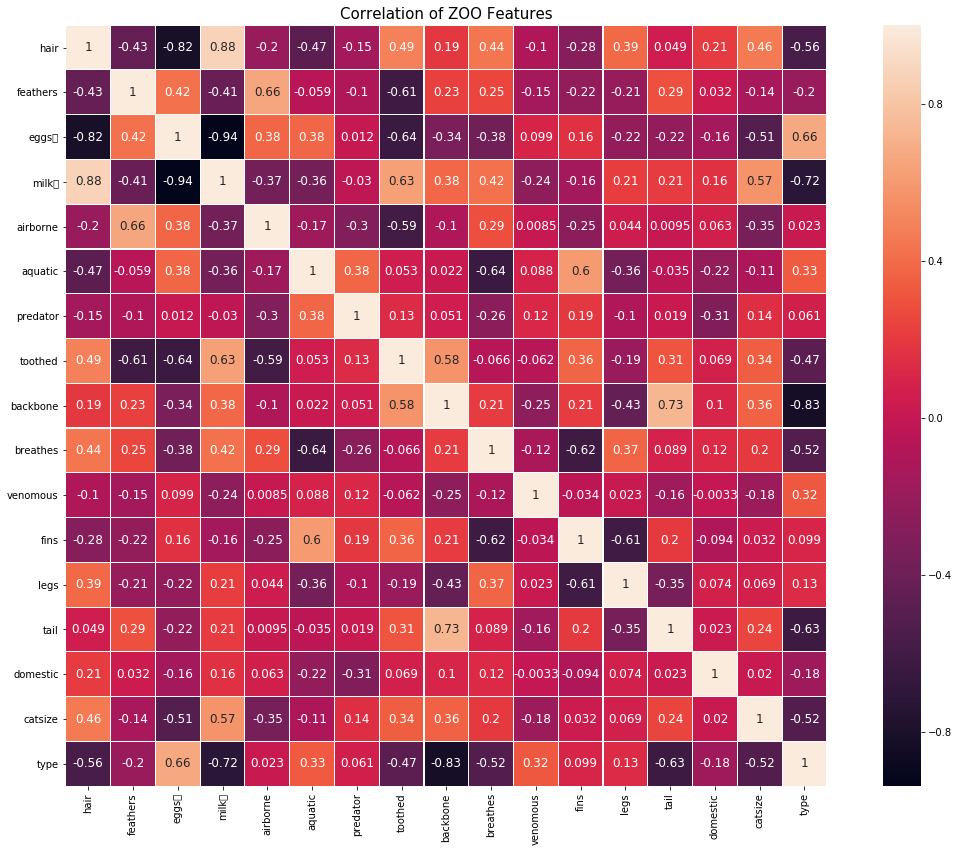

In [14]:
correlation_matrix = zoo_data.corr()
plt.figure(figsize=(20,14))
sns.heatmap(correlation_matrix, cbar=True,  square=True, annot=True,annot_kws={'size': 12}, linewidths=0.15, linecolor='white')
plt.title('Correlation of ZOO Features', y=1.05, size=15) 

# Interactive data visualisation

<IPython.core.display.Javascript object>


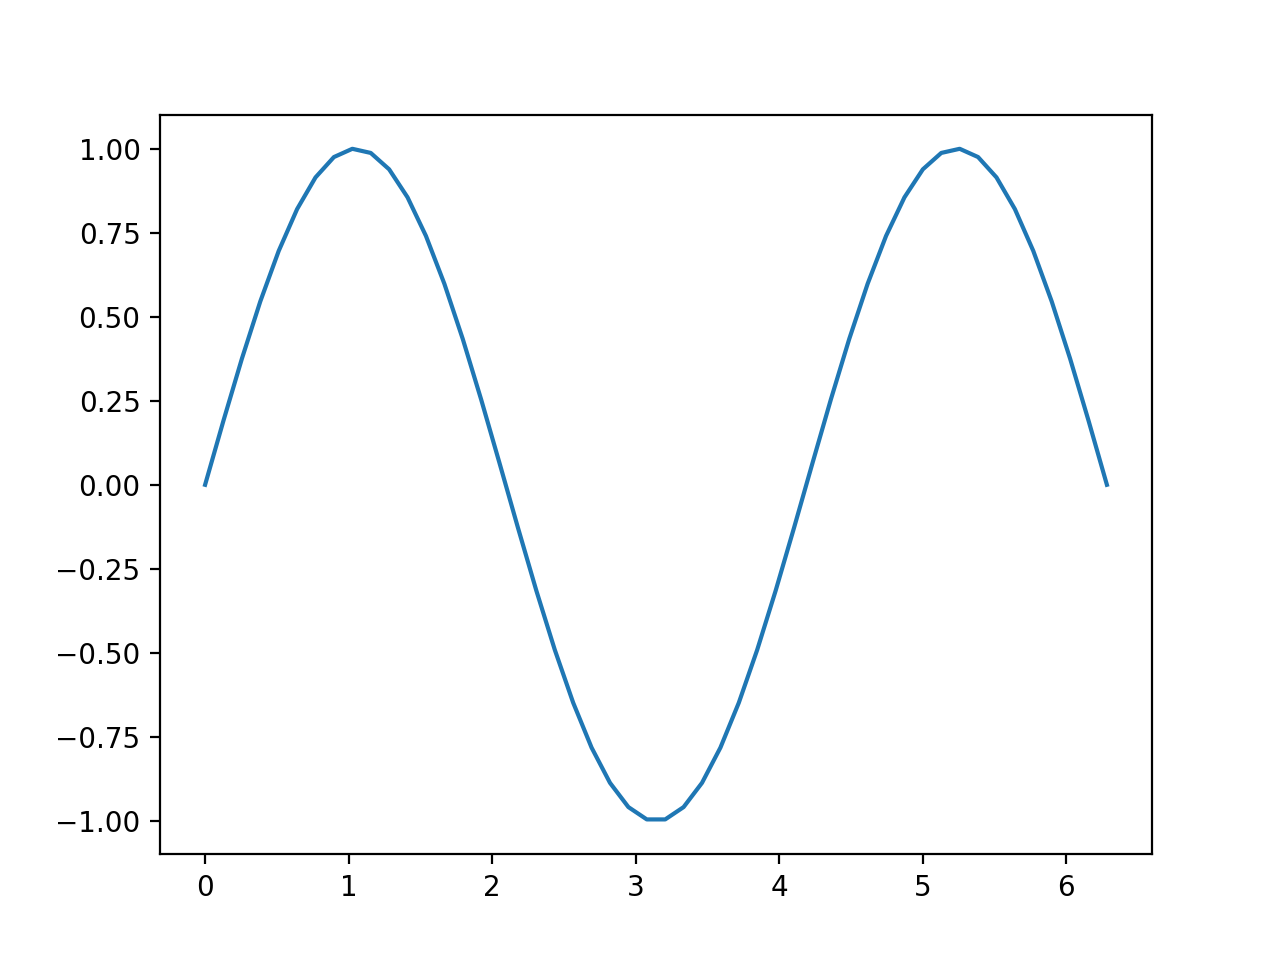

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [16]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw()

interact(update);